In [1]:
# Basic packages
import os
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Image preprocessing
import pathlib2
import PIL
import PIL.Image
import cv2
import splitfolders
from sklearn.model_selection import train_test_split

# Neural Networks
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical, load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, callbacks, regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, Activation
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

tfk = tf.keras
tf.keras.backend.set_floatx("float64")
%load_ext tensorboard

In [5]:
os.chdir('C:\\Users\\loren\\PycharmProjects\\MachineLearning')

In [6]:
#import zipfile
#with zipfile.ZipFile('CatsDogs.zip', 'r') as zip_ref:
#    zip_ref.extractall()

# Import of Data

In [52]:
# I set the directory from which images will be read and loaded
dir = 'C:\\Users\\loren\\PycharmProjects\\MachineLearning\\CatsDogs'

In [60]:
# I define some parameters in order resize image in an uniform way anf I set 3 as number of channels of the image, since I want RGB images
img_width = 128
img_height = 128
img_size = (img_width, img_height)
channels = 3

In [53]:
# Pets is the list in which alle the images will be stored
pets = []

# I define the two categories of pets ( related to the sub-directories)
categories = ['Cats','Dogs']

# I create a funciotn in order to load the data, transform the into array, assign them to a class and store them in the pets list
def create_data():

# the function iterates throught the two sub-directories
    for category in categories:
        path = os.path.join(dir, category)

# assign 0 to cat and 1 to dog, according to the index of the categories
        pet_class = categories.index(category)

# the function then iterates through each image in both the folders. I used the opencv (cv2 when imported) package to read and load them. IMREAD_COLOR keeps the color in the image, whereas IMREAD_GRAYSCALE would turn them into grayscale images.
# The function resize the images as defined by the previous parameters and finally appends the array of the image, together with the class value (creating a sub-list of two values for each image), to the pets list.
# The function skips those images which seem broken.
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                img_array = cv2.bitwise_not(img_array)
                new_array = cv2.resize(img_array, img_size)
                pets.append([new_array, pet_class])
            except Exception as e:
                pass

create_data()

In [54]:
print(len(pets))

24946


In [55]:
# since the previous function iterates linearly through the two sub-directories, iìI shuffle the data in order to mix shuffle the order of the images
random.shuffle(pets)

In [58]:
for sample in pets[:9]:
    print(sample[1])

1
1
1
0
0
0
0
1
0


In [90]:
# split the data arrays and the labels for the classification task

X = []
y = []

In [91]:
for image, label in pets:
    X.append(image)
    y.append(label)

X = np.array(X).reshape(-1, img_width, img_height, channels)

In [79]:
#y = np.array(y)

In [92]:
import pickle

pickle_out = open('X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [93]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

In [94]:
pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

# Data preparation

In [95]:
X = pickle.load(open('X.pickle','rb'))
y = pickle.load(open('y.pickle','rb'))

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

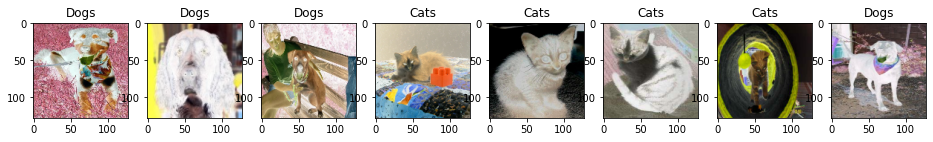

In [97]:
pets_classes = ['Cats','Dogs']
images_to_plot = 8

f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(16, 6)

for i in range(images_to_plot):
  ax[i].imshow(X[i])
  numeric_label = y[i]
  ax[i].set_title(pets_classes[numeric_label])